In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn  as sns

In [5]:
data=pd.read_csv('olympic.csv')

In [6]:
data.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [78]:
data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [79]:
#Checking the null value from the dataset

data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [80]:
#Replacing null value with zero

data.Medal.fillna(0,inplace=True)
data.Height.fillna(0,inplace=True)
data.Age.fillna(0,inplace=True)
data.Weight.fillna(0,inplace=True)

In [81]:
# Confirming the operation of replacing the null value with zero

data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [82]:
#Checking the statistical summary of the dataset

data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,24.663827,136.424553,54.305674,1978.378480
std,39022.286345,7.840652,73.450560,32.381492,29.877632
min,1.000000,0.000000,0.000000,0.000000,1896.000000
25%,34643.000000,21.000000,157.000000,47.000000,1960.000000
50%,68205.000000,24.000000,171.000000,64.000000,1988.000000
75%,102097.250000,28.000000,180.000000,75.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [34]:
#The dataset is divided into Summer and Winter

Summer_Oly=data[data['Season']=='Summer']
Winter_Oly=data[data['Season']=='Winter']   
Winter_Oly.head(2)
Summer_Oly.head(2)

                 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [38]:
#List down the total no of nation who participated in each summer olympic game
Summer_Oly.groupby('Games')['NOC'].nunique()



Games
1896 Summer     12
1900 Summer     31
1904 Summer     15
1906 Summer     21
1908 Summer     22
1912 Summer     29
1920 Summer     29
1924 Summer     45
1928 Summer     46
1932 Summer     47
1936 Summer     49
1948 Summer     59
1952 Summer     69
1956 Summer     72
1960 Summer     84
1964 Summer     93
1968 Summer    112
1972 Summer    121
1976 Summer     92
1980 Summer     80
1984 Summer    140
1988 Summer    159
1992 Summer    169
1996 Summer    197
2000 Summer    200
2004 Summer    201
2008 Summer    204
2012 Summer    205
2016 Summer    207
Name: NOC, dtype: int64

In [40]:
#List down the total no of nation who participated in each winter olympic game
Winter_Oly.groupby('Games')['NOC'].nunique()

Games
1924 Winter    19
1928 Winter    25
1932 Winter    17
1936 Winter    28
1948 Winter    28
1952 Winter    30
1956 Winter    32
1960 Winter    30
1964 Winter    36
1968 Winter    37
1972 Winter    35
1976 Winter    37
1980 Winter    37
1984 Winter    49
1988 Winter    57
1992 Winter    64
1994 Winter    67
1998 Winter    72
2002 Winter    77
2006 Winter    79
2010 Winter    82
2014 Winter    89
Name: NOC, dtype: int64

In [43]:
#The top 5 years with highest participation in summer olympic game

m=Summer_Oly[['Games','NOC',]]
m.groupby('Games').nunique().sort_values('NOC',ascending=False).head(5)

,NOC
Games,
2016 Summer,207
2012 Summer,205
2008 Summer,204
2004 Summer,201
2000 Summer,200


<AxesSubplot:xlabel='Games'>

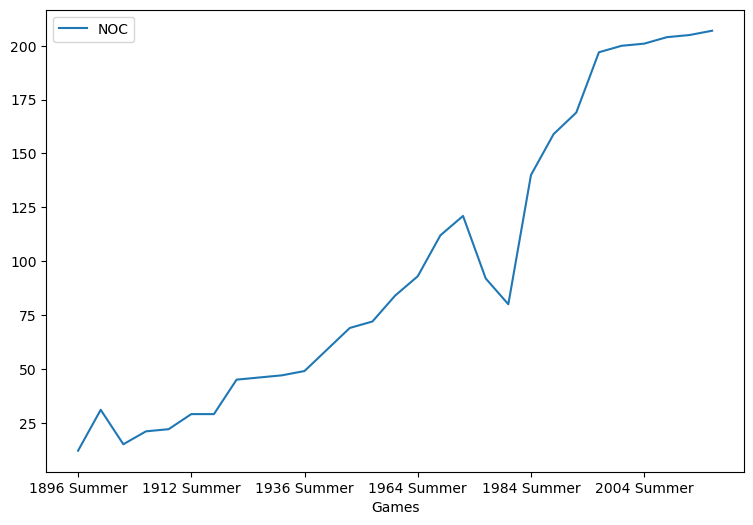

In [121]:
#Graphical representation participation in summber olympic

m=Summer_Oly[['Games','NOC',]]
Top_10=m.groupby('Games').nunique()
Top_10.plot(kind='line',figsize=(9,6))





In [51]:
#Years where summer olympic was hosted.

Summer_Oly.Year.unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [52]:
#Years where winter olympic was hosted.

Winter_Oly.Year.unique()

array([1988, 1992, 1994, 2002, 1980, 2014, 1998, 2006, 1960, 1964, 1984,
       1952, 1956, 2010, 1968, 1972, 1976, 1924, 1928, 1948, 1932, 1936],
      dtype=int64)

In [55]:
#Total number of years where summer olympic has been hosted.

Summer_Oly.Year.nunique()

29

In [57]:
#The team that participated in all olympic 29 summer olympic competition

Olympic_Participation=Summer_Oly.groupby('NOC').nunique()
Olympic_Participation[Olympic_Participation['Year']==29]

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
NOC,,,,,,,,,,,,,,
FRA,5353,5345,2,63,69,88,160,29,29,1,23,43,519,3
GBR,5646,5640,2,63,66,96,96,29,29,1,23,44,504,3
GRE,1643,1636,2,40,63,87,29,29,29,1,23,36,377,3
ITA,3999,3990,2,52,70,89,35,29,29,1,23,36,429,3
SUI,1886,1878,2,48,53,70,18,29,29,1,22,37,344,3


In [66]:
#Numbers of female participant in each year of the summer olympic competition

female=Summer_Oly[(Summer_Oly.Sex=='F')& (Summer_Oly.Season=='Summer')][['Year','Sex']]
female=female.groupby('Year').count().reset_index()
female


,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


<AxesSubplot:>

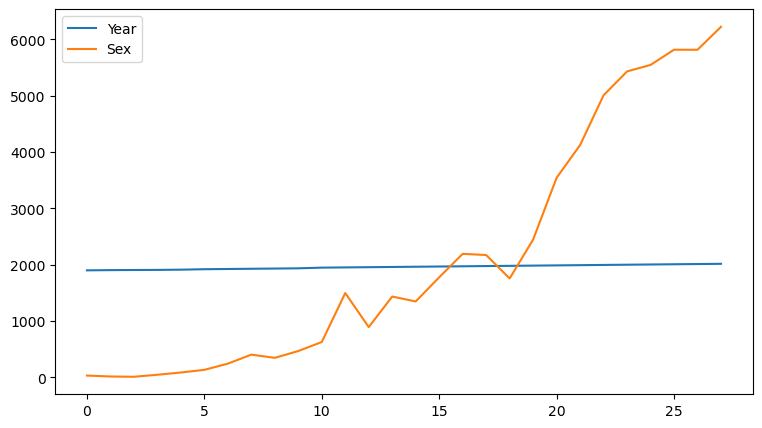

In [156]:
# Graphical representation of female participation in summer olympic
female.plot(kind='line',figsize=(9,5))

In [155]:
#Numbers of male participant in each year of the summer olympic competition

male=Summer_Oly[(Summer_Oly.Sex=='M')& (Summer_Oly.Season=='Summer')][['Year','Sex']]
male=male.groupby('Year').count().reset_index()
male

,Year,Sex
0,1896,380
1,1900,1903
2,1904,1285
3,1906,1722
4,1908,3054
5,1912,3953
6,1920,4158
7,1924,4989
8,1928,4588
9,1932,2622


In [68]:
#The total number of sport played in all summer olympic

Summer_Oly['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [70]:
#The sports that played in all winter olympic

Winter_Oly['Sport'].unique()

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

([<matplotlib.patches.Wedge at 0x1c71650cf10>,
 [Text(-0.7349375482397474, 0.8184539084074002, 'M'),
  Text(0.7349375482397474, -0.8184539084074003, 'F')],
 [Text(-0.4008750263125895, 0.4464294045858546, '73.3%'),
  Text(0.4008750263125895, -0.44642940458585467, '26.7%')])

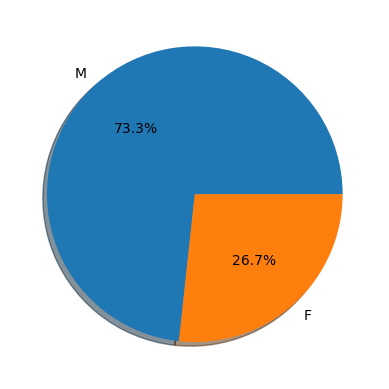

In [74]:
#Graphical representation of male and female participant in all summer Olympic competition

gender_c= Summer_Oly['Sex'].value_counts()
plt.pie(gender_c,labels=gender_c.index,autopct='%1.1f%%',shadow=True)

([<matplotlib.patches.Wedge at 0x1c71a2e1730>,
 [Text(0.541520824727143, 0.9574733397786254, 'Gold'),
  Text(-1.0997331681998705, -0.02422723180794066, 'Bronze'),
  Text(0.562477582523752, -0.9453142171565155, 'Silver')],
 [Text(0.2953749953057143, 0.5222581853337955, '33.6%'),
  Text(-0.5998544553817474, -0.013214853713422178, '33.5%'),
  Text(0.30680595410386474, -0.5156259366308266, '32.9%')])

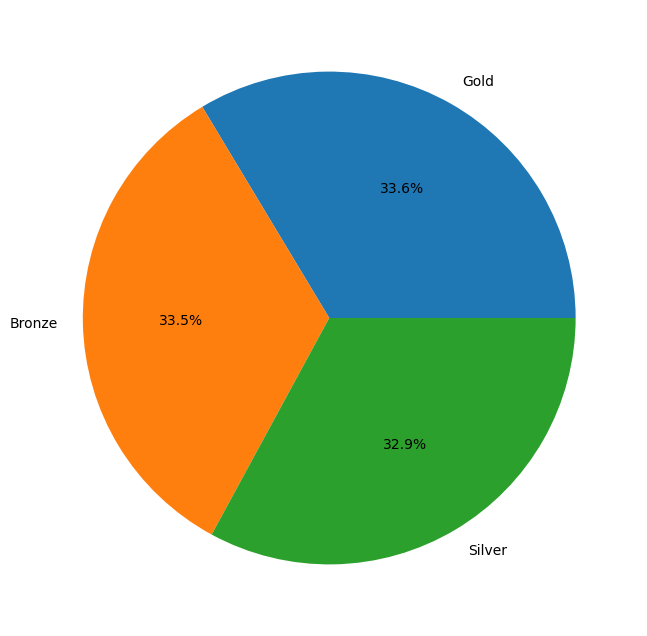

In [77]:
#Graphical representation of total number of medals won in gold,silver and bronze category

medal_count=Summer_Oly.Medal.value_counts()
plt.figure(figsize=(10,8))
plt.pie(medal_count,labels=medal_count.index,autopct='%1.1f%%')

In [90]:
# Number of golds won by each country

No_of_gold=Summer_Oly[(Summer_Oly.Medal=='Gold')][['NOC','Medal']]
No_of_gold=d.groupby('NOC').count().reset_index().sort_values('Medal',ascending=False)
No_of_gold.head(10)


,NOC,Medal
101,USA,2472
99,URS,832
36,GBR,636
39,GER,592
51,ITA,518
34,FRA,465
44,HUN,432
87,SWE,354
4,AUS,342
37,GDR,339


In [103]:
# Number of silver won by each country

No_of_silver=Summer_Oly[(Summer_Oly.Medal=='Silver')][['NOC','Medal']]
No_of_silver=No_of_silver.groupby('NOC').count().reset_index().sort_values('Medal',ascending=False)
No_of_silver.head(10)


,NOC,Medal
120,USA,1333
40,GBR,729
118,URS,635
37,FRA,575
43,GER,538
59,ITA,474
5,AUS,452
104,SWE,396
50,HUN,328
19,CHN,317


In [104]:
#Total number of bronze won by countries

No_of_bronze=Summer_Oly[(Summer_Oly.Medal=='Bronze')][['NOC','Medal']]
No_of_bronze=No_of_bronze.groupby('NOC').count().reset_index().sort_values('Medal',ascending=False)
No_of_bronze.head(10)

,NOC,Medal
117,USA,1197
42,GER,649
39,GBR,620
115,URS,596
37,FRA,587
5,AUS,510
57,ITA,454
78,NED,371
48,HUN,363
101,SWE,358


<AxesSubplot:xlabel='Year', ylabel='count'>

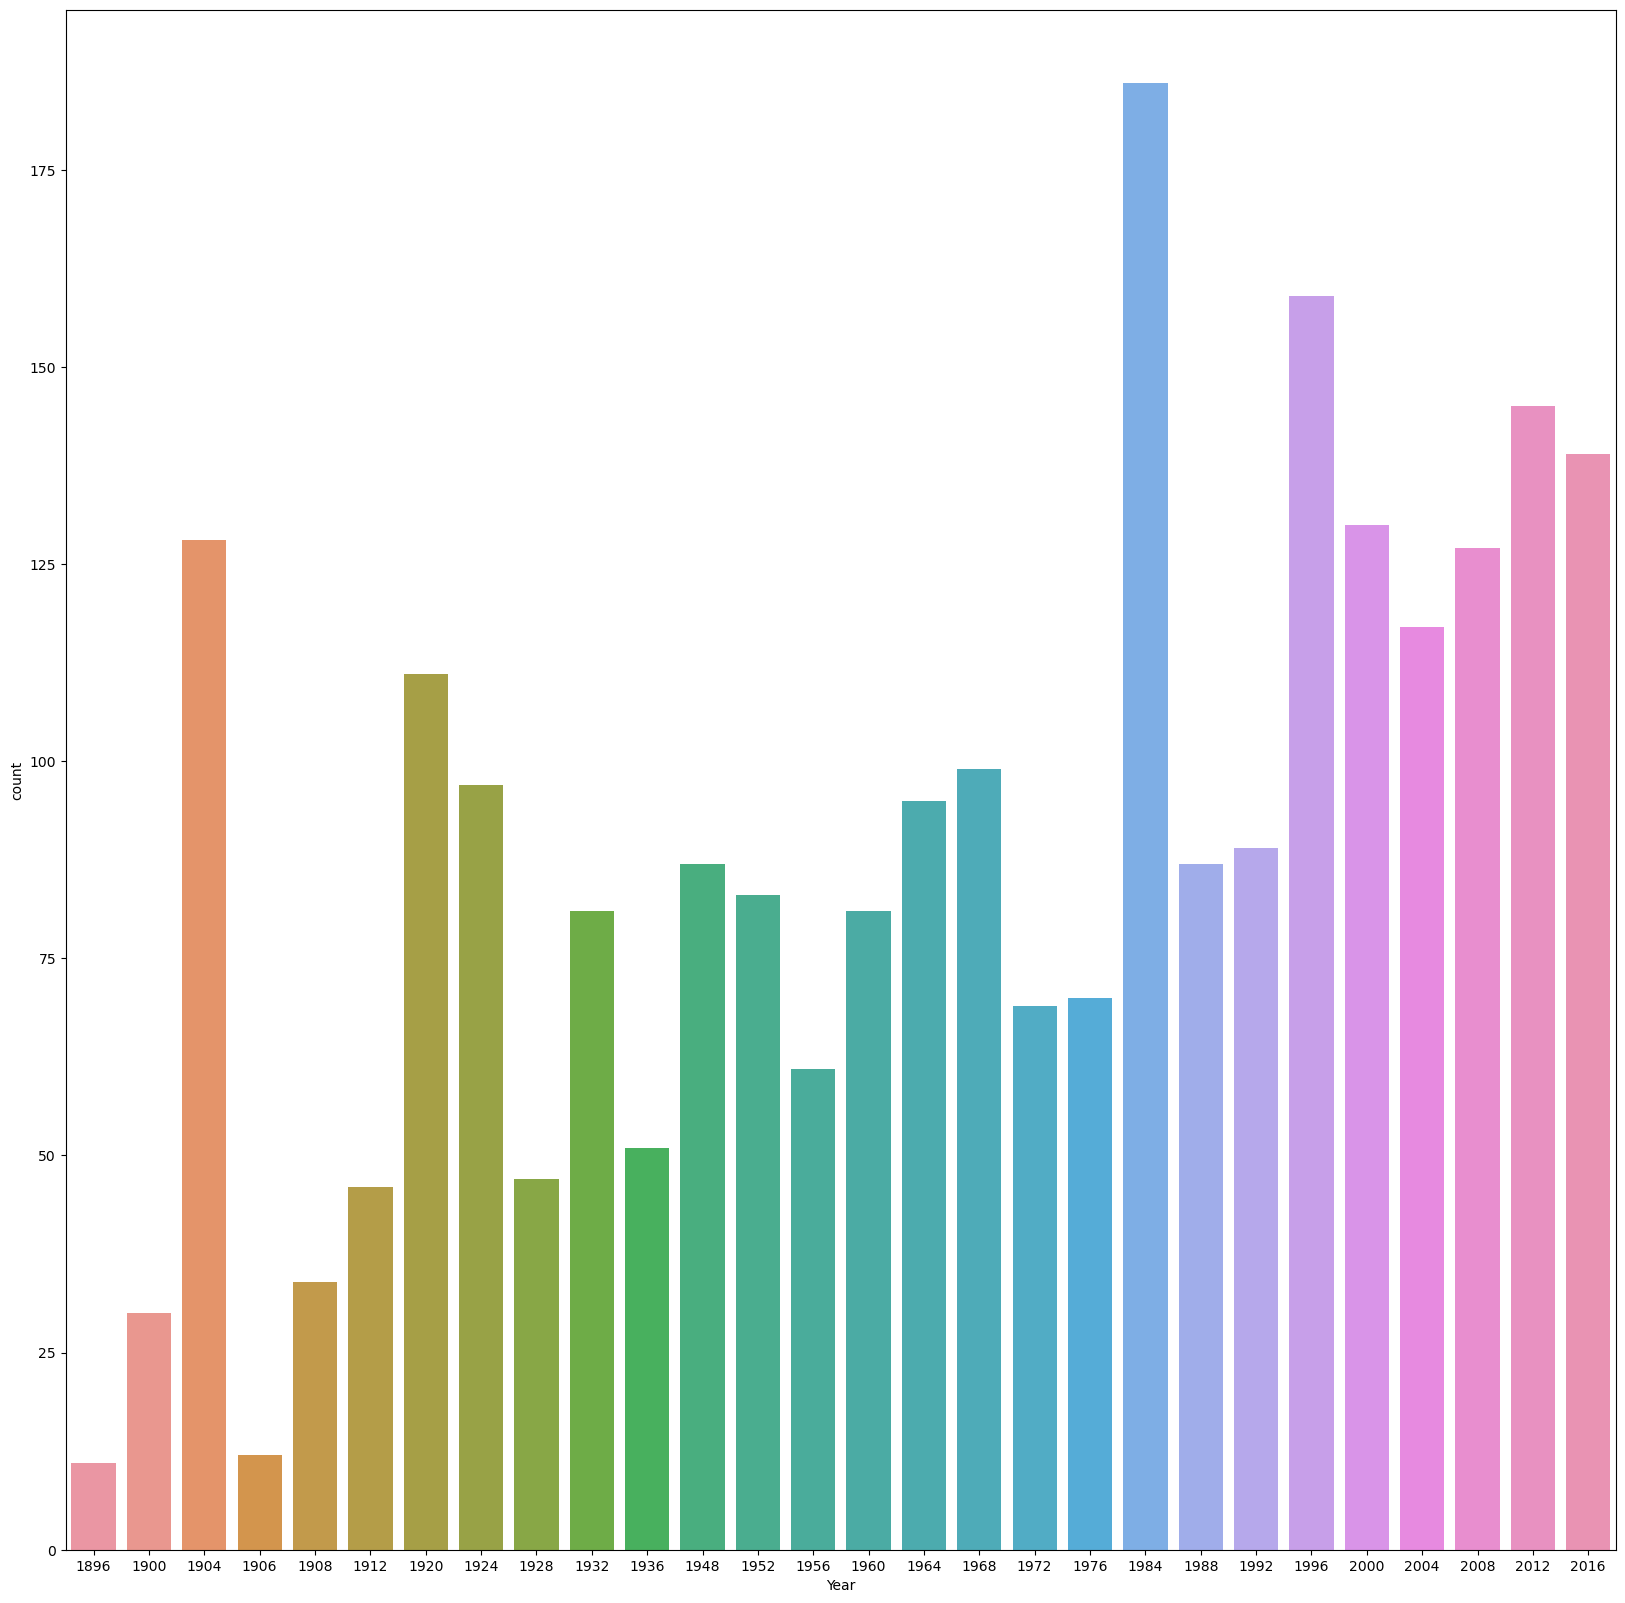

In [108]:
#Graphical representation of total gold won by USA by year.

d=Summer_Oly[(Summer_Oly.Medal=='Gold')&(Summer_Oly.NOC=='USA')]
plt.figure(figsize=(20,20))
sns.countplot(x='Year',data=d)

In [130]:
#The game that is played in all summer olympic

all_game=Summer_Oly.groupby('Sport').nunique()
all_game[all_game['Year']==29]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Event,Medal
Sport,,,,,,,,,,,,,,
Athletics,22071,22053,2,40,65,148,231,227,29,29,1,23,83,3
Cycling,5819,5819,2,33,55,60,150,145,29,29,1,23,44,3
Fencing,4123,4118,2,46,52,65,101,101,29,29,1,23,18,3
Gymnastics,4134,4132,2,37,55,64,109,93,29,29,1,23,27,3
Swimming,8765,8761,2,32,69,81,208,200,29,29,1,23,55,3


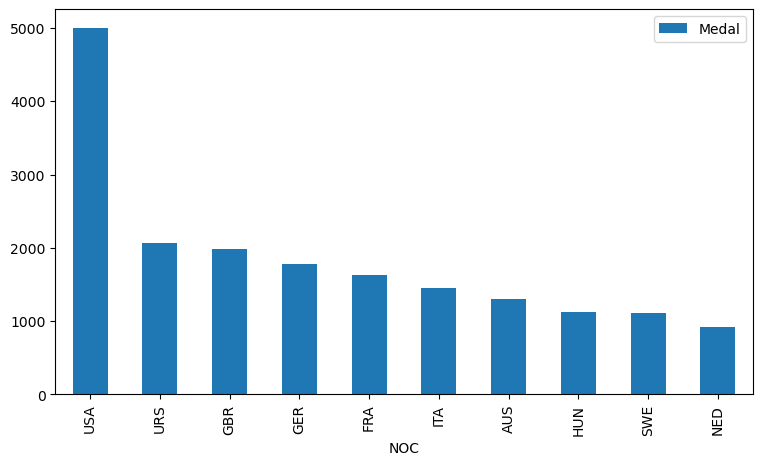

In [151]:
#Top 10 highest medal by country

total_medal=Summer_Oly[['NOC','Medal']]
total_medal=total_medal.groupby('NOC').count().nlargest(10,'Medal').plot(kind='bar',figsize=(9,5))


,Year,Medal
0,1996,17
1,2000,6


In [158]:
#Nigeria 1996 olympic analysis

nigeria=data.query("Team=='Nigeria'")

In [159]:
nigeria.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
211,101,Adeyemi Abayomi,M,25.0,170.0,51.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Lightweight,0
544,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 100 metres,0


In [175]:
#Total medal won by Nigeria in 1996

Nig_96=nigeria[nigeria['Year']==1996]
Nig_96.Medal.value_counts()

0         60
Gold      17
Silver     4
Bronze     3
Name: Medal, dtype: int64

In [178]:
# Sport played by Nigerian

nigeria.Sport.unique()

array(['Boxing', 'Athletics', 'Tennis', 'Table Tennis', 'Judo',
       'Football', 'Wrestling', 'Handball', 'Badminton', 'Canoeing',
       'Basketball', 'Weightlifting', 'Swimming', 'Taekwondo', 'Rowing'],
      dtype=object)

In [184]:
#List of players with total medal won

nigeria.groupby('Name')['Medal'].count().sort_values(ascending=False).head(20)

Name
Nkemdilim "Mary" Onyali-Omagbemi        12
Segun Moses Toriola                     10
Olapade Charles Adeniken                 7
Bose Kaffo                               7
Olufunke "Funke" Oshonaike (-Irabor)     7
Blessing Okagbare (-Ighoteguonor)        7
Falilat Ogunkoya (-Osheku)               6
Deji Aliu                                6
Oludamola Bolanle "Damola" Osayomi       6
Sunday Bada                              6
Uchenna Emedolu                          6
Davidson Ezinwa                          5
Innocent Ejima Egbunike                  5
Samuel Igun                              5
Mercy Akpanchang Nku (-Esimoneze)        5
Sunday Uti                               5
Gloria Asumnu                            5
Abdul Karim Ohimai Amu                   5
Chukwudi "Chidi" Imoh                    5
Robert Ojo                               4
Name: Medal, dtype: int64